### Imports

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Análisis del dataset

Pueden haber valores nulos en el dataset, por lo que se deben de eliminar o reemplazar por un valor adecuado.

**TODO: usar el clasificador naive bayes para predecir los valores NaN dados los valores de las otras columnas.**

In [38]:
# Load the data
data = pd.read_csv('reviews_sentiment.csv', sep=';')

# Map 'positivo' to 1 and 'negativo' to 0 in 'Title sentiment' and 'text sentiment'
def map_sentiment(sentiment_series):
    """
    Maps 'positivo' to 1 and 'negativo' to 0 in a pandas Series.
    Unmapped values will be set to NaN.
    """
    mapping = {'positive': 1, 'negative': 0}
    sentiment_series = sentiment_series.str.lower()  # Convert to lowercase
    sentiment_series_mapped = sentiment_series.map(mapping)
    
    # Identify and report unmapped values
    unmapped = sentiment_series[~sentiment_series.isin(mapping.keys())].unique()
    if len(unmapped) > 0:
        print("Warning: The following sentiment values were not mapped and will be set to NaN:")
        print(unmapped)
    
    return sentiment_series_mapped

data['titleSentiment'] = map_sentiment(data['titleSentiment'])
data['textSentiment'] = map_sentiment(data['textSentiment'])

# Check for NaN values in relevant columns
print("NaN values before imputation:")
print(data[['wordcount', 'titleSentiment', 'sentimentValue']].isnull().sum())

# Impute missing values in 'Title sentiment' with mode
if data['titleSentiment'].isnull().sum() > 0:
    title_sentiment_mode = data['titleSentiment'].mode()[0]
    data['titleSentiment'] = data['titleSentiment'].fillna(title_sentiment_mode)

# Impute missing values in 'sentimentValue' with mean
if data['sentimentValue'].isnull().sum() > 0:
    sentiment_value_mean = data['sentimentValue'].mean()
    data['sentimentValue'] = data['sentimentValue'].fillna(sentiment_value_mean)

# Impute missing values in 'wordcount' with mean
if data['wordcount'].isnull().sum() > 0:
    wordcount_mean = data['wordcount'].mean()
    data['wordcount'] = data['wordcount'].fillna(wordcount_mean)

print("\nNaN values after imputation:")
print(data[['wordcount', 'titleSentiment', 'sentimentValue']].isnull().sum())

[nan]
NaN values before imputation:
wordcount          0
titleSentiment    26
sentimentValue     0
dtype: int64

NaN values after imputation:
wordcount         0
titleSentiment    0
sentimentValue    0
dtype: int64


### Part a)

Los comentarios valorados con 1 estrella, ¿qué cantidad promedio de palabras tienen?

In [39]:
# Part a) Average word count for 1-star reviews
def calculate_average_wordcount_for_star(data, star_rating):
    """
    Calculates the average word count for reviews with a specific star rating.
    """
    reviews = data[data['Star Rating'] == star_rating]
    average_wordcount = reviews['wordcount'].mean()
    return average_wordcount

average_wordcount = calculate_average_wordcount_for_star(data, 1)
print(f"\nAverage word count for 1-star reviews: {average_wordcount}")



Average word count for 1-star reviews: 12.216216216216216


### Part b)

In [40]:
# Part b) Split the dataset into training and test sets
def split_dataset(data, features, target, test_size=0.2, random_state=42):
    """
    Splits the dataset into training and test sets.
    """
    X = data[features]
    y = data[target]
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

features = ['wordcount', 'titleSentiment', 'sentimentValue']
target = 'Star Rating'
X_train, X_test, y_train, y_test = split_dataset(data, features, target)

### Part c)

In [41]:

# Part c) Implement K-NN and K-NN with weighted distances
def standardize_features(X_train, X_test):
    """
    Standardizes features using the training set mean and std.
    """
    feature_means = X_train.mean()
    feature_stds = X_train.std()
    X_train_scaled = (X_train - feature_means) / feature_stds
    X_test_scaled = (X_test - feature_means) / feature_stds
    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = standardize_features(X_train, X_test)

def knn_predict(X_train, y_train, X_test, k):
    """
    Implements the standard K-NN algorithm.
    """
    from collections import Counter
    y_pred = []
    
    X_train_values = X_train.values
    X_test_values = X_test.values
    y_train_values = y_train.values

    for i in range(X_test_values.shape[0]):
        distances = np.sqrt(np.sum((X_train_values - X_test_values[i, :])**2, axis=1))
        neighbor_indices = distances.argsort()[:k]
        neighbor_labels = y_train_values[neighbor_indices]
        most_common = Counter(neighbor_labels).most_common(1)[0][0]
        y_pred.append(most_common)
    
    return np.array(y_pred)

def knn_weighted_predict(X_train, y_train, X_test, k):
    """
    Implements the K-NN algorithm with weighted distances.
    """
    from collections import defaultdict
    y_pred = []
    
    X_train_values = X_train.values
    X_test_values = X_test.values
    y_train_values = y_train.values

    for i in range(X_test_values.shape[0]):
        distances = np.sqrt(np.sum((X_train_values - X_test_values[i, :])**2, axis=1))
        neighbor_indices = distances.argsort()[:k]
        neighbor_labels = y_train_values[neighbor_indices]
        neighbor_distances = distances[neighbor_indices]
        weights = 1 / (neighbor_distances + 1e-5)
        class_weights = defaultdict(float)
        for label, weight in zip(neighbor_labels, weights):
            class_weights[label] += weight
        predicted_class = max(class_weights.items(), key=lambda x: x[1])[0]
        y_pred.append(predicted_class)
    
    return np.array(y_pred)

### Part d)


Results for k = 1 (Standard K-NN):
Accuracy: 0.8269


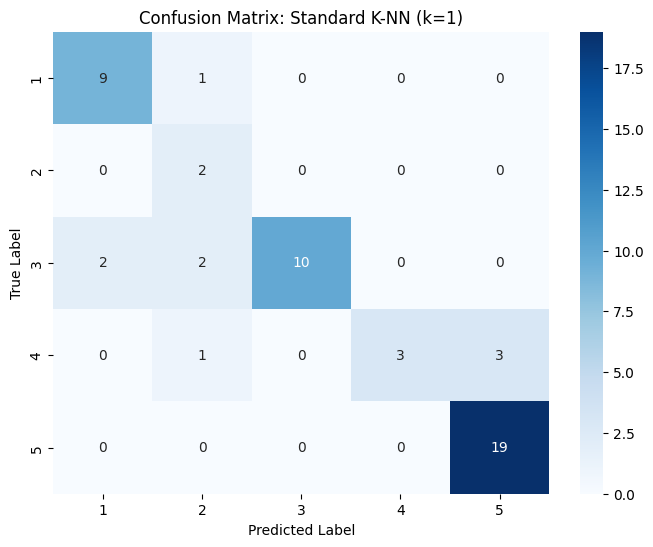


Results for k = 1 (Weighted K-NN):
Accuracy: 0.8269


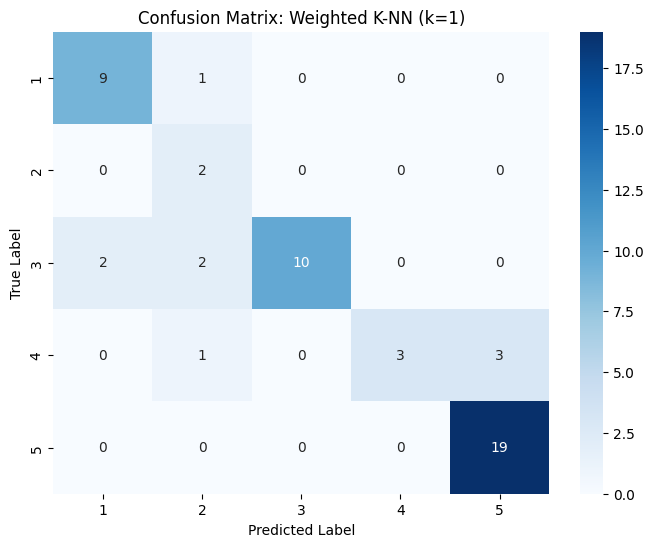


Results for k = 3 (Standard K-NN):
Accuracy: 0.9038


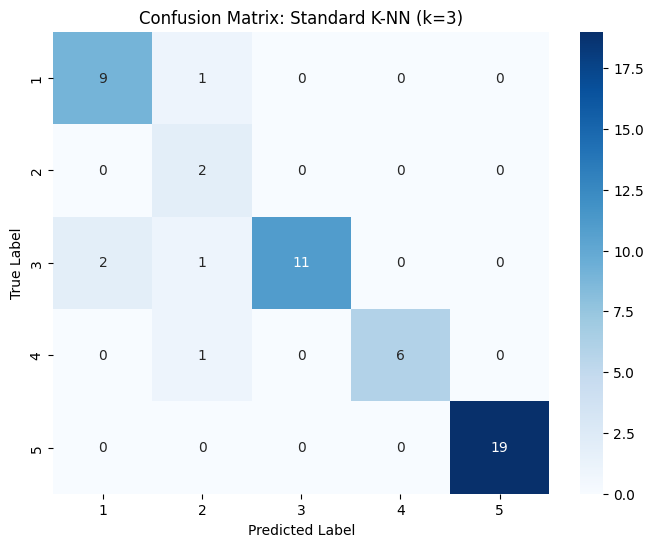


Results for k = 3 (Weighted K-NN):
Accuracy: 0.8846


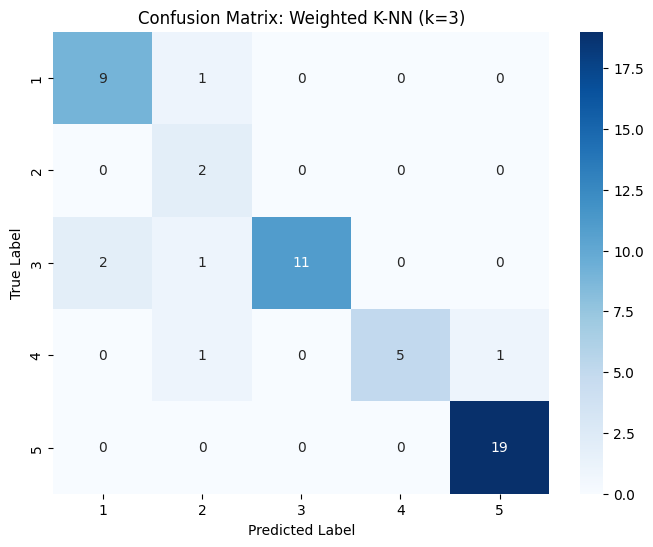


Results for k = 5 (Standard K-NN):
Accuracy: 0.8462


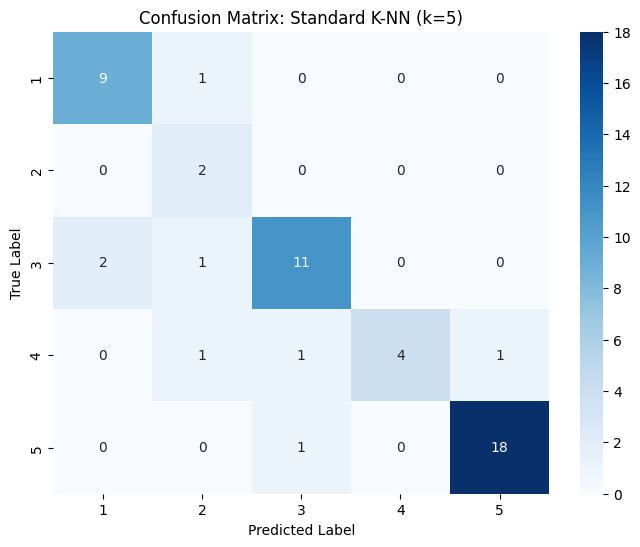


Results for k = 5 (Weighted K-NN):
Accuracy: 0.8846


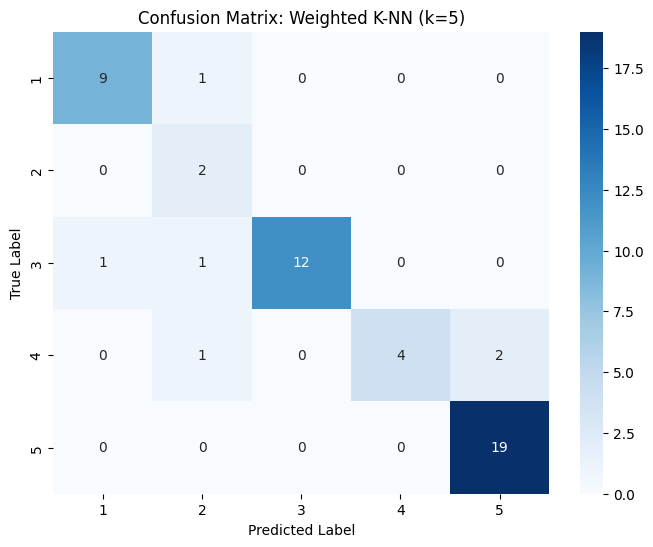


Results for k = 7 (Standard K-NN):
Accuracy: 0.8462


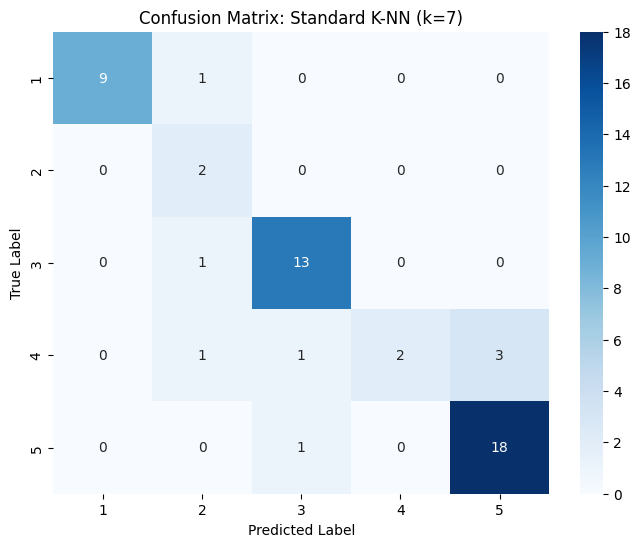


Results for k = 7 (Weighted K-NN):
Accuracy: 0.8654


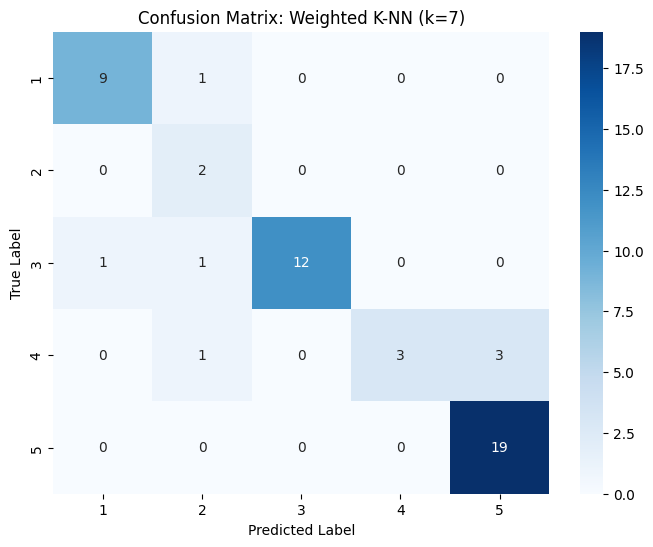


Results for k = 9 (Standard K-NN):
Accuracy: 0.8654


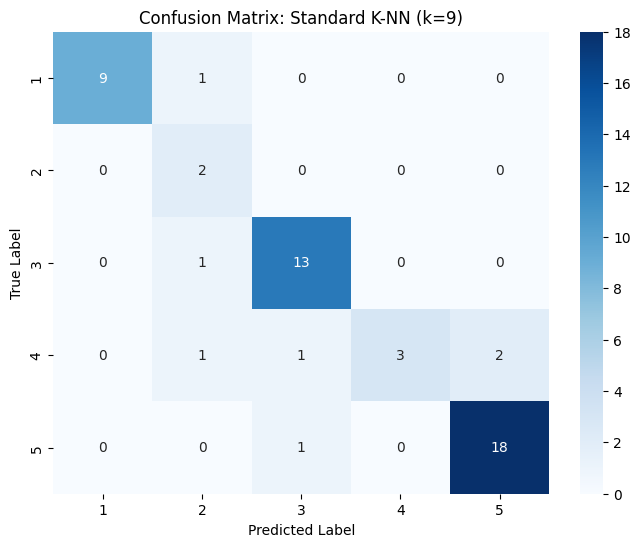


Results for k = 9 (Weighted K-NN):
Accuracy: 0.8846


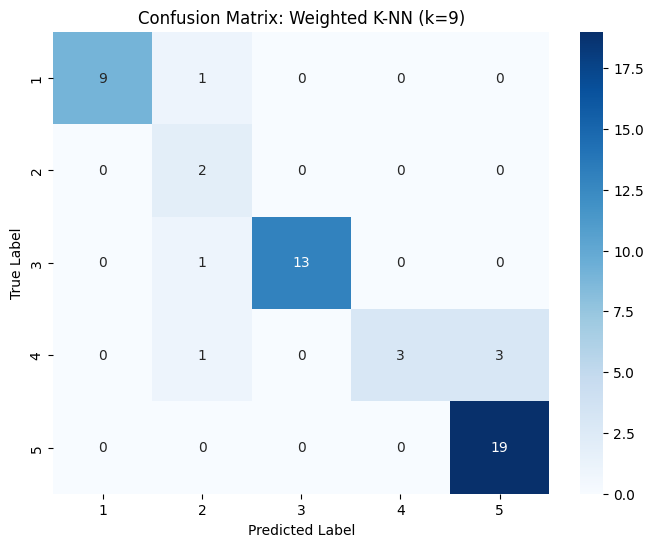


Results for k = 11 (Standard K-NN):
Accuracy: 0.8462


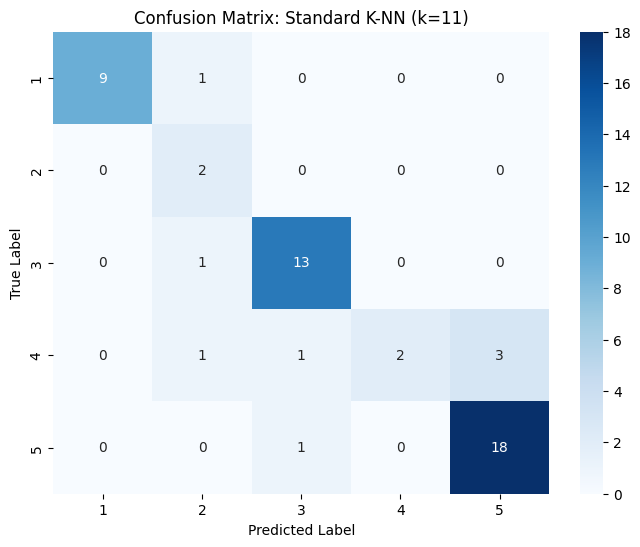


Results for k = 11 (Weighted K-NN):
Accuracy: 0.8846


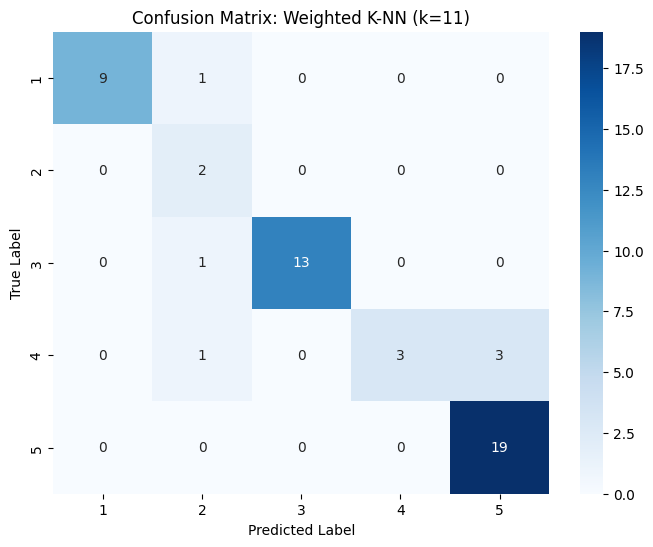

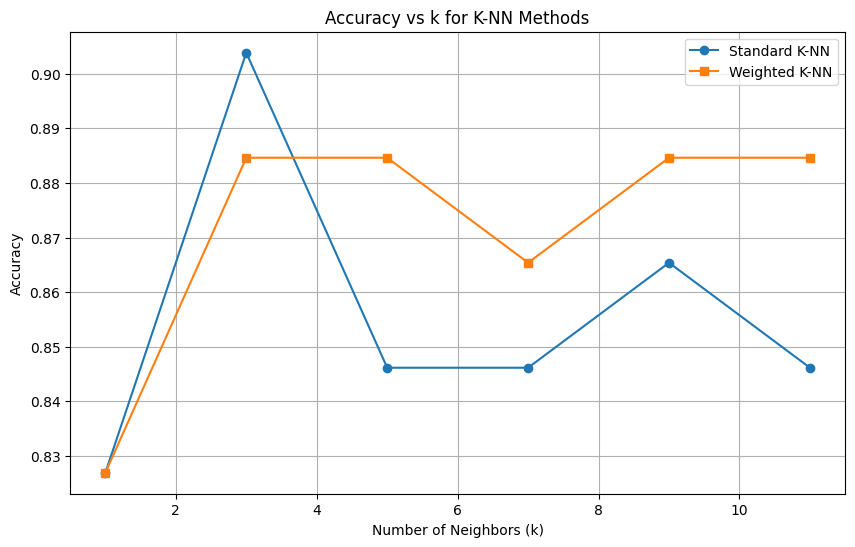

In [42]:
# Part d) Calculate accuracy and confusion matrix
def calculate_accuracy(y_true, y_pred):
    """
    Calculates the accuracy of the predictions.
    """
    return np.sum(y_true == y_pred) / len(y_true)

def plot_confusion_matrix(y_true, y_pred, labels, title):
    """
    Plots the confusion matrix as a heatmap.
    """
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)
    
    plt.figure(figsize=(8,6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {title}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Run K-NN algorithms with different k values and collect accuracies
k_values = [1, 3, 5, 7, 9, 11]
labels = sorted(y_train.unique())

accuracy_knn = []
accuracy_knn_weighted = []

for k in k_values:
    print(f"\nResults for k = {k} (Standard K-NN):")
    y_pred = knn_predict(X_train_scaled, y_train, X_test_scaled, k)
    accuracy = calculate_accuracy(y_test.values, y_pred)
    accuracy_knn.append(accuracy)
    print(f"Accuracy: {accuracy:.4f}")
    plot_confusion_matrix(y_test.values, y_pred, labels, f'Standard K-NN (k={k})')
    
    print(f"\nResults for k = {k} (Weighted K-NN):")
    y_pred_weighted = knn_weighted_predict(X_train_scaled, y_train, X_test_scaled, k)
    accuracy_weighted = calculate_accuracy(y_test.values, y_pred_weighted)
    accuracy_knn_weighted.append(accuracy_weighted)
    print(f"Accuracy: {accuracy_weighted:.4f}")
    plot_confusion_matrix(y_test.values, y_pred_weighted, labels, f'Weighted K-NN (k={k})')

# Plotting accuracy vs k for both methods
plt.figure(figsize=(10,6))
plt.plot(k_values, accuracy_knn, marker='o', label='Standard K-NN')
plt.plot(k_values, accuracy_knn_weighted, marker='s', label='Weighted K-NN')
plt.title('Accuracy vs k for K-NN Methods')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()